In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#importing Dataset
df=pd.read_csv('Black_Friday.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
# Checking Basic Statistics of Dataset
# Mean
np.mean(df.Purchase)

9263.968712959126

In [5]:
# Median
np.median(df.Purchase)

8047.0

In [6]:
# Checking Missing Values:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# Filling Null Values with mode
df.Product_Category_2=df.Product_Category_2.fillna(8.0)
df.Product_Category_3=df.Product_Category_3.fillna(16.0)

In [8]:
# Checking Missing Values:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
# Checking Unique Values

len(df.User_ID.unique())

5891

# Performing EDA

<Axes: xlabel='Purchase', ylabel='Density'>

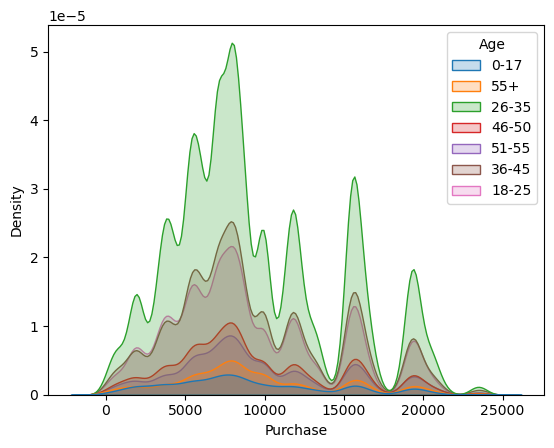

In [10]:
# KDE Plot
sns.kdeplot(x=df.Purchase,hue=df.Age,fill=True)

In [11]:
# Pie Plot & bar- with respect to Purchase in any city


In [12]:
df.groupby('City_Category')['Purchase'].sum()

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

In [24]:
px.bar(y=df.groupby('City_Category')['Purchase'].sum(),x=df.groupby('City_Category')['Purchase'].sum().index,template='plotly_dark',text=df.groupby('City_Category')['Purchase'].sum())

<Axes: >

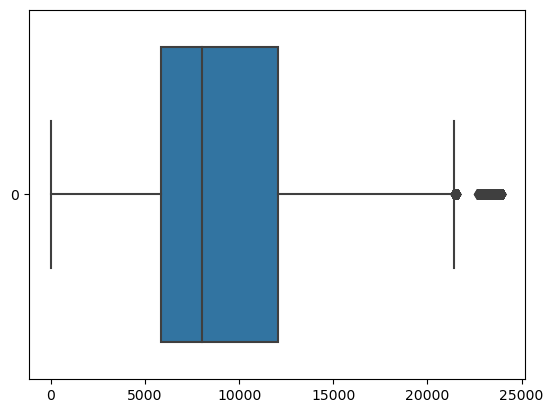

In [26]:
# Checking Outliers

sns.boxplot(df.Purchase,orient='h')

In [27]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)

In [28]:
iqr=q3-q1

In [29]:
ul=q3+1.5*(iqr)
ll=q1+1.5*(iqr)

In [30]:
df[df.Purchase>ul]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,16.0,16.0,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,13.0,16.0,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,15.0,16.0,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,13.0,16.0,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,16.0,16.0,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,13.0,16.0,23663


In [33]:
# Replacing Outliers
df.Purchase=np.where(df.Purchase>ul,ul,df.Purchase)

<Axes: >

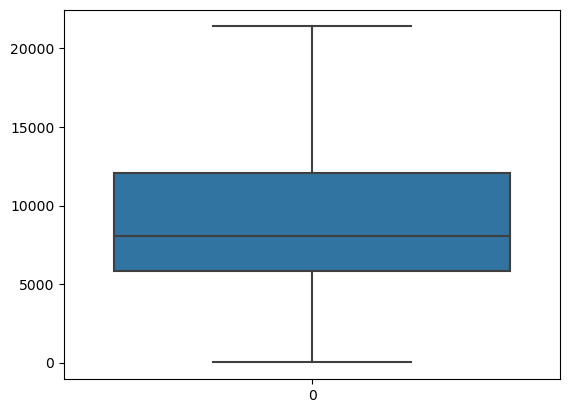

In [34]:
sns.boxplot(df.Purchase)

In [41]:
# Convering gender Catagorical Column into Integer

df.Gender=np.where(df.Gender=='M',0,df.Gender)
df.Gender=np.where(df.Gender=='F',1,df.Gender)

<Axes: xlabel='Age', ylabel='Purchase'>

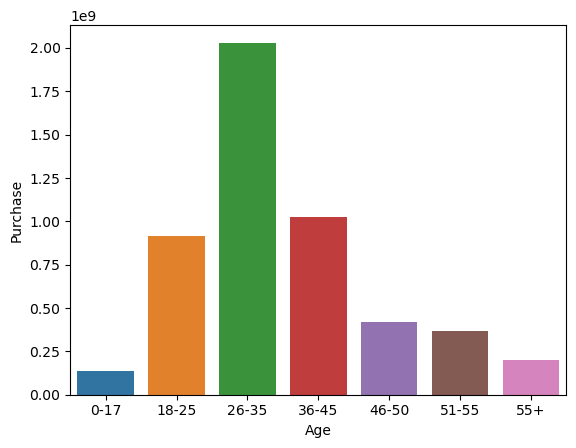

In [47]:
# Age VS Purchased
sns.barplot(x=df.groupby('Age')['Purchase'].sum().index,y=df.groupby('Age')['Purchase'].sum())

<Axes: xlabel='Occupation', ylabel='Purchase'>

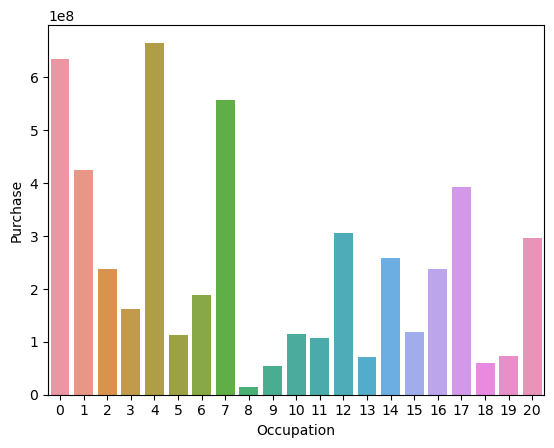

In [48]:
# Occupation VS Purchased
sns.barplot(x=df.groupby('Occupation')['Purchase'].sum().index,y=df.groupby('Occupation')['Purchase'].sum())

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

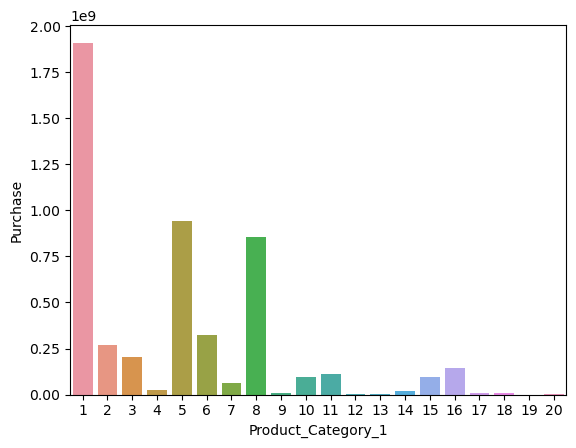

In [49]:
# Product category-1 VS Purchased
sns.barplot(x=df.groupby('Product_Category_1')['Purchase'].sum().index,y=df.groupby('Product_Category_1')['Purchase'].sum())

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

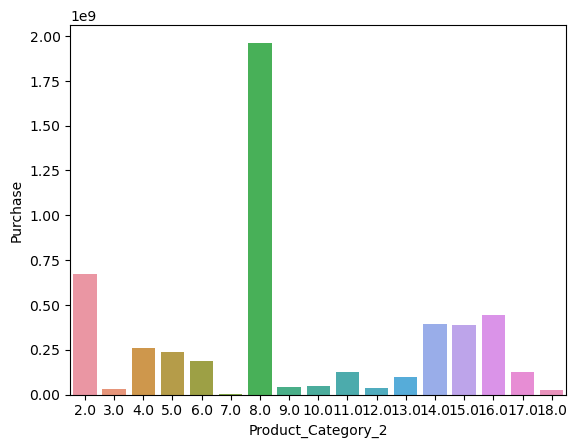

In [50]:
# Product category-2 VS Purchased
sns.barplot(x=df.groupby('Product_Category_2')['Purchase'].sum().index,y=df.groupby('Product_Category_2')['Purchase'].sum())

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

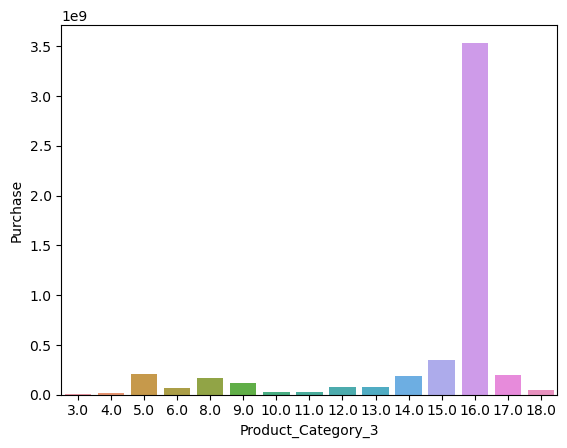

In [51]:
# Product category-3 VS Purchased
sns.barplot(x=df.groupby('Product_Category_3')['Purchase'].sum().index,y=df.groupby('Product_Category_3')['Purchase'].sum())

([<matplotlib.patches.Wedge at 0x29a0e4f28d0>,
 [Text(0.7571515787694743, 0.7979482983044033, 'A'),
  Text(-1.074898912425582, 0.23365001191162102, 'B'),
  Text(0.5703825265063078, -0.9405656667433069, 'C')],
 [Text(0.412991770237895, 0.43524452634785626, '25.8%'),
  Text(-0.5863084976866811, 0.12744546104270235, '41.5%'),
  Text(0.3111177417307133, -0.5130358182236219, '32.6%')])

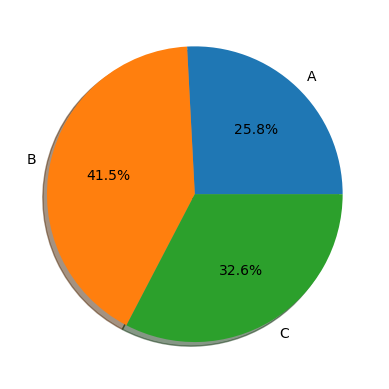

In [52]:
# City category vs Purchased
plt.pie(df.groupby('City_Category')['Purchase'].sum(),labels=df.groupby('City_Category')['Purchase'].sum().index,autopct='%1.1f%%',shadow=True)